<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/Eq_onda_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Método pseudoespectral a qeuação da onda em 1 dimensão


# tpsi + colpsi = 0;  unidimensional


N = 300

L0 = 20

col = np.cos(np.arange(N)*math.pi / (N-1))     # pontos de colocação
x = L0 * np.arctanh(col)                   # mapeamento   

xcol = (1 - np.tanh(x/L0)**2)/L0              # dcol/dx


# Matriz base (Polinômios de Tchebyshev):

T = np.zeros([N+2,N])
xT = np.zeros([N+2,N])
colT = np.zeros([N+2,N])


T[0,] = 1
T[1,] = col

for i in range(2,N+2):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

# Derivada Matriz Base:

colT[0,] = 0
colT[1,] = 1

xT[0,] = xcol*colT[0,]
xT[1,] = xcol*colT[1,]

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]

xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx


psi = T[0:N,:]   
xpsi = xT[0:N,:]


# Condicoes iniciais

u = (0.3)**(1/2)


f_0 = np.exp(-(x**2)/(u**2))              # dado inicial da  equação da onda



inv_psi = np.linalg.inv(psi)
  

a0 = np.dot(f_0, inv_psi)  # coeficientes a(0)

phi = np.dot(a0, psi)      # solução exata em t=0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in arctanh


In [2]:
# Plot: Condições Iniciais

M = 3000

xplot = np.linspace(-30,30,M)

colplot = np.tanh(xplot/L0)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in range(2,N+2):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N,:] 


f_plot0 = np.exp(-((xplot)**2)/(u)**2)    

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - f_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)

np.shape(f_plot0)

(3000,)

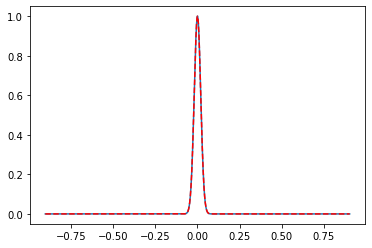

In [3]:
plt.plot(colplot, phiplot, colplot, f_plot0, "--r")

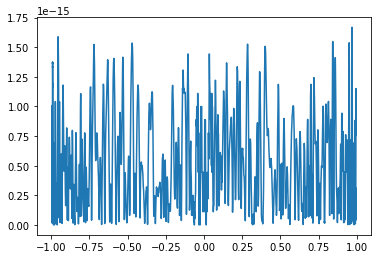

In [ ]:
plt.plot(colplot, erro)

In [12]:
h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It )

phi_set = np.zeros([It,M])

#phi0_set = np.zeros([0,It])

for i in range(It):  # Runge Kutta 4th order

  da = np.dot(- np.dot(a0, xpsi), inv_psi) 
  K1 = h*(da)

  da = np.dot(- np.dot(a0 + K1/2, xpsi), inv_psi) 
  K2 = h*(da)

  da = np.dot(- np.dot(a0 + K2/2, xpsi), inv_psi)  
  K3 = h*(da)

  da = np.dot(- np.dot(a0 + K3, xpsi), inv_psi) 
  K4 = h*(da)
  
  a0 = a0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set[i,:] = np.dot(a0, psiplot)




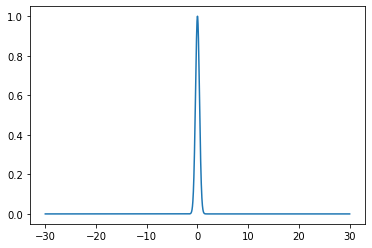

In [35]:
plt.plot(xplot, phi_set[i,:])

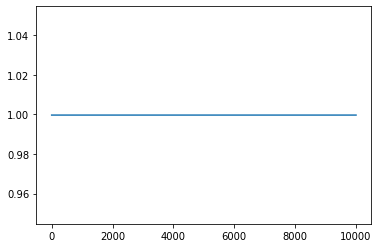

In [33]:
plt.plot(phi_set[:,M//2])

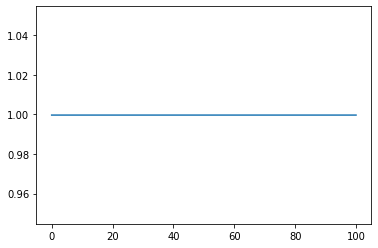

In [32]:
plt.plot(t, phi_set[:,1500])


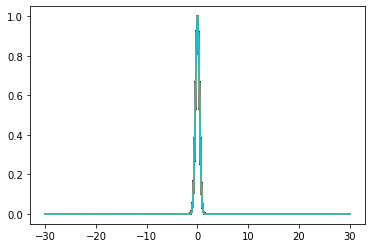

In [ ]:

for i in range(It):
  plt.plot(xplot, phi_set[i,:])